<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [1]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [2]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

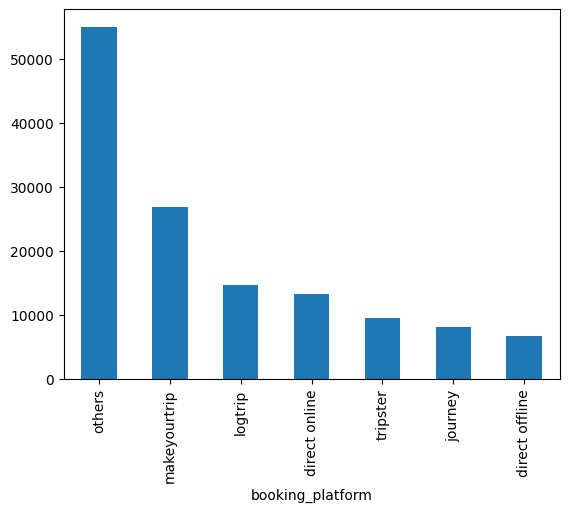

In [8]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [10]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [13]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

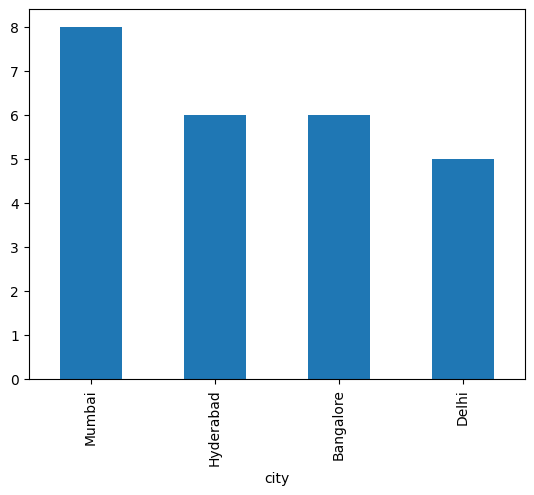

In [14]:
df_hotels.city.value_counts().plot(kind="bar")

***
**Exercise: Explore aggregate bookings**
***

In [15]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [16]:
# write your code here

In [17]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [18]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Exercise-2. Find out total bookings per property_id**

In [19]:
# write your code here

In [20]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()


property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Exercise-3. Find out days on which bookings are greater than capacity**

In [21]:
# write your code here

In [22]:
df_agg_bookings.loc[
    df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity'],
    'check_in_date'
].tolist()


['1-May-22', '1-May-22', '11-Jun-22', '2-Jul-22', '25-Jul-22', '31-Jul-22']

In [23]:
df_agg_bookings.loc[
    df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity'],
    'check_in_date'
].reset_index(drop=True)


0     1-May-22
1     1-May-22
2    11-Jun-22
3     2-Jul-22
4    25-Jul-22
5    31-Jul-22
Name: check_in_date, dtype: object

**Exercise-4. Find out properties that have highest capacity**

In [24]:
# write your code here

In [25]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [26]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [27]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [28]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [29]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [30]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [31]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [32]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(np.float64(15378.036937686695), np.float64(13500.0))

In [33]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [34]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [35]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [36]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [37]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [38]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [39]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [40]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33479.358661845814)

In [41]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [42]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [43]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [44]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [45]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [46]:
# write your code here

In [47]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [48]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [ ]:
# write your code here

In [ ]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]


***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [ ]:
df_agg_bookings.head(3)

In [ ]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [ ]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

Convert it to a percentage value

In [ ]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

In [ ]:
df_bookings.head()

In [ ]:
df_agg_bookings.info()

There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [ ]:
df_agg_bookings.head(3)

In [ ]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [ ]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

In [ ]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

In [ ]:
df.groupby("room_class")["occ_pct"].mean()

In [ ]:
df[df.room_class=="Standard"].occ_pct.mean()

**2. Print average occupancy rate per city**

In [ ]:
df_hotels.head(3)

In [ ]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

In [ ]:
df.groupby("city")["occ_pct"].mean()

**3. When was the occupancy better? Weekday or Weekend?**

In [ ]:
df_date.head(3)

In [ ]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

In [ ]:
df.groupby("day_type")["occ_pct"].mean().round(2)

**4: In the month of June, what is the occupancy for different cities**

In [ ]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

In [ ]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

In [ ]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [ ]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

In [ ]:
df_august.columns

In [ ]:
df.columns

In [ ]:
df_august.shape

In [ ]:
df.shape

In [ ]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

In [ ]:
latest_df.shape

Check this post for codebasics resume project challange winner entry: https://www.linkedin.com/posts/ashishbabaria_codebasicsresumeprojectchallenge-data-powerbi-activity-6977940034414886914-dmoJ?utm_source=share&utm_medium=member_desktop

**6. Print revenue realized per city**

In [ ]:
df_bookings.head()

In [ ]:
df_hotels.head(3)

In [ ]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

In [ ]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

**7. Print month by month revenue**

In [ ]:
df_date.head(3)

In [ ]:
df_date["mmm yy"].unique()

In [ ]:
df_bookings_all.head(3)

In [ ]:
df_date.info()

In [ ]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

In [ ]:
df_bookings_all.info()

In [ ]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

In [ ]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

In [ ]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

**Exercise-1. Print revenue realized per hotel type**

In [8]:
import pandas as pd
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')
fact_bookings =  pd.read_csv('datasets/fact_bookings.csv')

In [4]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [5]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [6]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [7]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [9]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


**Exercise-1. Print revenue realized per hotel type**

In [ ]:
# write your code here

In [21]:
df_rev_hotel_type = pd.merge(
    fact_bookings,
    df_hotels,
    on = "property_id",
    how="left"
)
df_rev_hotel_type.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [24]:
df_rev_hotel_type.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Exotica    320312468
Atliq Grands     211532764
Atliq Palace     304081863
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

**Exercise-2 Print average rating per city**

In [ ]:
# write your code here

In [25]:
df_rev_hotel_type.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

**Exercise-3 Print a pie chart of revenue realized per booking platform**

In [ ]:
# write your code here

In [ ]:
df_bookings["room_category"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")  # removes y-label
plt.title("Bookings by Room Category")
plt.show()

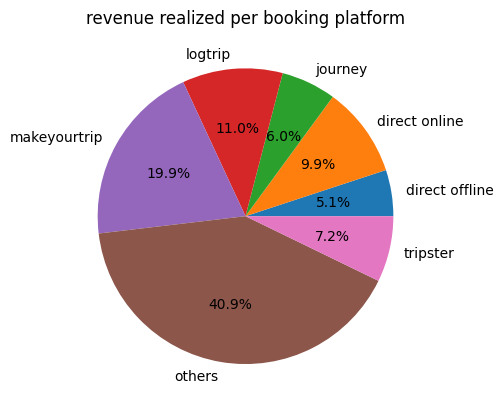

In [36]:
import matplotlib.pyplot as plt
df_rev_hotel_type.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")  
plt.title("revenue realized per booking platform")
plt.show()